<a href="https://colab.research.google.com/github/techpvk/techpvk/blob/master/test_pirmid_meetpvk_working_23_03_of_Vkt_TinyImageNet_StarterNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# List and Clear the Data first
!ls
!rm -rf sample_data tiny-imagenet-200	tiny-imagenet-200.zip

tiny-imagenet-200  tiny-imagenet-200.zip


In [0]:
# list content after the clearing data
!ls

In [19]:
# Download the file
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2019-03-27 09:33:23--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  20.2MB/s    in 14s     

2019-03-27 09:33:38 (16.6 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [20]:
#unzip and list
!unzip -qq 'tiny-imagenet-200.zip'
!ls

tiny-imagenet-200  tiny-imagenet-200.zip


In [0]:
# import the required packages
import pandas as pd
import numpy as np
import six
from keras.preprocessing.image import ImageDataGenerator
from __future__ import division
from keras.models import Model
from keras.layers import (
    Input,
    Activation,
    Dense,
    Flatten,
    Dropout
)
from keras.layers.convolutional import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D
)
from keras.layers.merge import add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras import backend as K
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import os
import cv2
from keras.layers import GlobalAveragePooling2D
from keras.models import Model, load_model, model_from_yaml
from keras.utils.vis_utils import plot_model
from datetime import datetime
from google.colab import files
from keras.layers.advanced_activations import LeakyReLU

In [22]:
# load data
val_data = pd.read_csv('./tiny-imagenet-200/val/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])
val_data.drop(['X', 'Y', 'H', 'W'], axis=1, inplace=True)
val_data.head(10)

,File,Class
0,val_0.JPEG,n03444034
1,val_1.JPEG,n04067472
2,val_2.JPEG,n04070727
3,val_3.JPEG,n02808440
4,val_4.JPEG,n02808440
5,val_5.JPEG,n04399382
6,val_6.JPEG,n04179913
7,val_7.JPEG,n02823428
8,val_8.JPEG,n04146614
9,val_9.JPEG,n02226429


In [0]:
# Use Augmentaion parameters as required.
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    zoom_range = 0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    rotation_range=20,
    horizontal_flip=True
    )

valid_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', target_size=(32, 32), color_mode='rgb', 
                                                    batch_size=50, class_mode='categorical', shuffle=True, seed=42)

Found 100000 images belonging to 200 classes.


In [25]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/', x_col='File', y_col='Class', target_size=(32, 32),
                                                    color_mode='rgb', class_mode='categorical', batch_size=50, shuffle=True, seed=42)


Found 10000 images belonging to 200 classes.


In [26]:
x_batch, y_batch = next(train_generator)
x_batch.shape

(20, 32, 32, 3)

In [27]:
input = Input(shape=(32, 32, 3,))

# Layer 1
layer1 = Conv2D(32, (3,1), strides=(1,1), padding='same', use_bias=False)(input)
layer1 = BatchNormalization()(layer1)
layer1 = Conv2D(32, (1,3), strides=(1,1), padding='same', use_bias=False)(layer1)
layer1 = BatchNormalization()(layer1)

layer1 = Conv2D(64, (3,1), strides=(1,1), padding='same', use_bias=False)(layer1)
layer1 = BatchNormalization()(layer1)
layer1 = Conv2D(64, (1,3), strides=(1,1), padding='same', use_bias=False)(layer1)
layer1 = LeakyReLU(alpha=0.1)(layer1)

layer1 = Conv2D(128, (3,1), strides=(1,1), padding='same', use_bias=False)(layer1)
layer1 = BatchNormalization()(layer1)
layer1 = Conv2D(128, (1,3), strides=(1,1), padding='same', use_bias=False)(layer1)
layer1 = BatchNormalization()(layer1)

layer1 = Conv2D(256, (3,1), strides=(1,1), padding='same', use_bias=False)(layer1)
layer1 = BatchNormalization()(layer1)
layer1 = Conv2D(256, (1,3), strides=(1,1), padding='same', use_bias=False)(layer1)
layer1 = BatchNormalization()(layer1)


layer1 = Conv2D(512, (3,1), strides=(1,1), padding='same', use_bias=False)(layer1)
layer1 = BatchNormalization()(layer1)
layer1 = Conv2D(512, (1,3), strides=(1,1), padding='same', use_bias=False)(layer1)
layer1 = BatchNormalization()(layer1)


# Layer 2
layer2 = Conv2D(64, (3,1), strides=(1,1), padding='same', use_bias=False)(layer1)
layer2 = BatchNormalization()(layer2)
layer2 = Conv2D(64, (1,3), strides=(1,1), padding='same', use_bias=False)(layer2)
layer2 = BatchNormalization()(layer2)

layer2 = Conv2D(128, (3,1), strides=(1,1), padding='same', use_bias=False)(layer2)
layer2 = BatchNormalization()(layer2)
layer2 = Conv2D(128, (1,3), strides=(1,1), padding='same', use_bias=False)(layer2)
layer2 = BatchNormalization()(layer2)


layer2 = Conv2D(256, (3,1), strides=(1,1), padding='same', use_bias=False)(layer2)
layer2 = BatchNormalization()(layer2)
layer2 = Conv2D(256, (1,3), strides=(1,1), padding='same', use_bias=False)(layer2)
layer2 = BatchNormalization()(layer2)


layer2 = Conv2D(512, (3,1), strides=(1,1), padding='same', use_bias=False)(layer2)
layer2 = BatchNormalization()(layer2)
layer2 = Conv2D(512, (1,3), strides=(1,1), padding='same', use_bias=False)(layer2)
layer2 = BatchNormalization()(layer2)


layer2 = Conv2D(1024, (3,3), strides=(1,1), padding='same', use_bias=False)(layer2)
layer2 = BatchNormalization()(layer2)
layer2 = Conv2D(1024, (1,3), strides=(1,1), padding='same', use_bias=False)(layer2)
layer2 = BatchNormalization()(layer2)

layer2 = MaxPooling2D(pool_size=(2, 2))(layer2)

# Layer 3
layer3 = Conv2D(128, (3,1), strides=(1,1), padding='same', use_bias=False)(layer2)
layer3 = BatchNormalization()(layer3)
layer3 = Conv2D(128, (1,3), strides=(1,1), padding='same', use_bias=False)(layer3)
layer3 = BatchNormalization()(layer3)

layer3 = Conv2D(256, (3,1), strides=(1,1), padding='same', use_bias=False)(layer3)
layer3 = BatchNormalization()(layer3)
layer3 = Conv2D(256, (1,3), strides=(1,1), padding='same', use_bias=False)(layer3)
layer3 = BatchNormalization()(layer3)


layer3 = Conv2D(512, (3,1), strides=(1,1), padding='same', use_bias=False)(layer3)
layer3 = BatchNormalization()(layer3)
layer3 = Conv2D(512, (1,3), strides=(1,1), padding='same', use_bias=False)(layer3)
layer3 = BatchNormalization()(layer3)


layer3 = Conv2D(1024, (3,1), strides=(1,1), padding='same', use_bias=False)(layer3)
layer3 = BatchNormalization()(layer3)
layer3 = Conv2D(1024, (1,3), strides=(1,1), padding='same', use_bias=False)(layer3)
layer3 = BatchNormalization()(layer3)


layer3 = Conv2D(2048, (3,3), strides=(1,1), padding='same', use_bias=False)(layer3)
layer3 = BatchNormalization()(layer3)
layer3 = Conv2D(2048, (1,3), strides=(1,1), padding='same', use_bias=False)(layer3)
layer3 = BatchNormalization()(layer3)

layer3 = MaxPooling2D(pool_size=(2, 2))(layer3)

# Layer 4
layer4 = Conv2D(128, (3,1), strides=(1,1), padding='same', use_bias=False)(layer3)
layer4 = BatchNormalization()(layer4)
layer4 = Conv2D(128, (1,3), strides=(1,1), padding='same', use_bias=False)(layer4)
layer4 = BatchNormalization()(layer4)

layer4 = Conv2D(256, (3,1), strides=(1,1), padding='same', use_bias=False)(layer4)
layer4 = BatchNormalization()(layer4)
layer4 = Conv2D(256, (1,3), strides=(1,1), padding='same', use_bias=False)(layer4)
layer4 = BatchNormalization()(layer4)


layer4 = Conv2D(512, (3,1), strides=(1,1), padding='same', use_bias=False)(layer4)
layer4 = BatchNormalization()(layer4)
layer4 = Conv2D(512, (1,3), strides=(1,1), padding='same', use_bias=False)(layer4)
layer4 = BatchNormalization()(layer4)


layer4 = Conv2D(1024, (3,1), strides=(1,1), padding='same', use_bias=False)(layer4)
layer4 = BatchNormalization()(layer4)
layer4 = Conv2D(1024, (1,3), strides=(1,1), padding='same', use_bias=False)(layer4)
layer4 = BatchNormalization()(layer4)


layer4 = Conv2D(2048, (3,3), strides=(1,1), padding='same', use_bias=False)(layer4)
layer4 = BatchNormalization()(layer4)
layer4 = Conv2D(2048, (1,3), strides=(1,1), padding='same', use_bias=False)(layer4)
layer4 = BatchNormalization()(layer4)

layer4 = MaxPooling2D(pool_size=(2, 2))(layer4)
#final layer (block8)
out = Conv2D(200, (1,1), strides=(1,1), padding='same', use_bias=False)(layer4)
out = GlobalAveragePooling2D(data_format='channels_last')(out)
out = BatchNormalization()(out)
out = Activation('softmax') (out)
model = Model(inputs=input, outputs=out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        288       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        3072      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 64)        6144      
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 64)        256       
__________

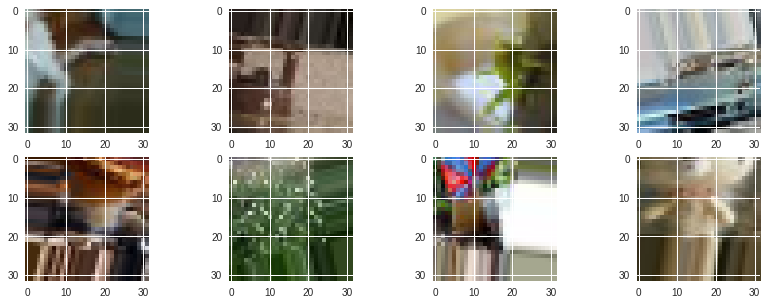

In [28]:
# Plot Generator images.  ** Re-run the cell to view different set of images.

fig = plt.figure(figsize=(14, 5))

for i in range(8):
    sub = fig.add_subplot(2, 4, i + 1)
    sub.imshow(x_batch[i,:,:], interpolation='nearest')

In [0]:
nb_classes = 200
#nb_epoch = 100
# input image dimensions
img_rows, img_cols = 32, 32
img_channels = 3
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


['model_plot.png', 'test', 'train', 'val', 'wnids.txt', 'words.txt']


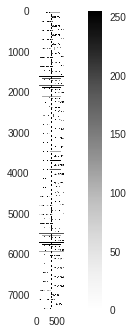

In [30]:
plot_model(model, to_file='./tiny-imagenet-200/model_plot.png', show_shapes=True, show_layer_names=True)
items = os.listdir('./tiny-imagenet-200')
print (items)    
image = cv2.imread('./tiny-imagenet-200/model_plot.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)

In [0]:


files.download('./tiny-imagenet-200/model_plot.png')

In [32]:
#model.fit_generator(train_generator, epochs=nb_epoch, steps_per_epoch=200, validation_steps=200, validation_data=validation_generator
##steps_per_epoch=Integer. Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch. 
#It should typically be equal to ceil(num_samples / batch_size) Optional for Sequence: if unspecified, will use the len(generator) as a number of steps.
##validation_steps=Only relevant if validation_data is a generator. Total number of steps (batches of samples) to yield from validation_data generator before stopping at the end of every epoch. 
#It should typically be equal to the number of samples of your validation dataset divided by the batch size. Optional for Sequence: if unspecified, will use the len(validation_data) as a number of steps.
##epochs: Integer. Number of epochs to train the model. An epoch is an iteration over the entire data provided, as defined by steps_per_epoch. 
#Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs,
#but merely until the epoch of index epochs is reached.
#steps_per_epoch=100000/200=500
#validation_steps=10000/200=50
#nb_epoch = 100
nb_epoch = 50
model.fit_generator(train_generator, epochs=nb_epoch, steps_per_epoch=500, validation_steps=50, validation_data=validation_generator)

Epoch 1/1
500/500 [==============================] - 641s 1s/step - loss: 5.4591 - acc: 0.0077 - val_loss: 7.1368 - val_acc: 0.0070
